In [39]:
print("hola")

hola


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Exploración de los datos

In [41]:
data = pd.read_csv(r"Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [42]:
# Pasando columnas categóricas a numéricas.
data['Gender'] = (data['Gender'] == 'Male').astype(int) # 1 es masculino, 0 es femenino.

#1 si es Yes, 0 si es No, para ambas columnas.
data['Have you ever had suicidal thoughts ?'] = (data['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int) 
data['Family History of Mental Illness'] = (data['Family History of Mental Illness'] == 'Yes').astype(int)

<Axes: xlabel='Age'>

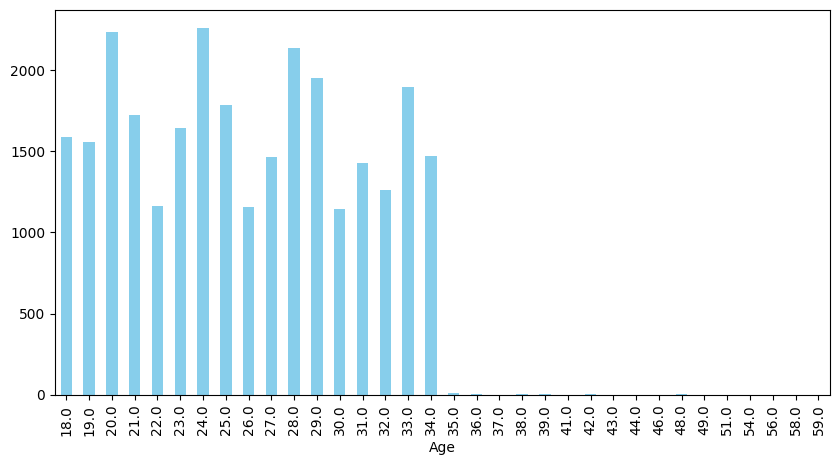

In [43]:
data["Age"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="skyblue")

In [44]:
data = data[data['Age'] < 35.0] #Eliminando minorias.

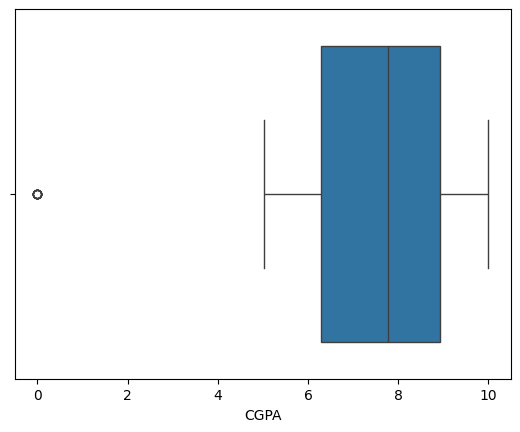

In [63]:
# Visualizar outliers con boxplot
sns.boxplot(x=data['CGPA'])
plt.show()

# Eliminar outliers usando el método IQR
Q1 = data['CGPA'].quantile(0.25)
Q3 = data['CGPA'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos sin outliers
data = data[(data['CGPA'] >= Q1 - 1.5 * IQR) & (data['CGPA'] <= Q3 + 1.5 * IQR)]

In [45]:
data["Financial Stress"].value_counts()

Financial Stress
5.0    6702
4.0    5759
3.0    5220
1.0    5116
2.0    5052
Name: count, dtype: int64

In [46]:
data["Job Satisfaction"].value_counts() #Se puede observar que al ser estudiantes no trabajan, por lo que se eliminará esta columna.

Job Satisfaction
0.0    27845
2.0        3
1.0        2
3.0        1
4.0        1
Name: count, dtype: int64

In [47]:
data["Depression"].value_counts() 

Depression
1    16323
0    11529
Name: count, dtype: int64

In [48]:
data["Work Pressure"].value_counts() #Se eliminará

Work Pressure
0.0    27850
2.0        1
5.0        1
Name: count, dtype: int64

In [49]:
data["Sleep Duration"].value_counts()
data = data[data['Sleep Duration'] != 'Others'] #eliminar valores Others

In [58]:
#Reemplazar los valroes por números.

data['Sleep Duration'] = data['Sleep Duration'].replace({
    'Less than 5 hours': 4.5,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9.0
})

C:\Users\Seba\AppData\Local\Temp\ipykernel_15448\1390263298.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sleep Duration'] = data['Sleep Duration'].replace({


In [57]:
data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration Num
0,1,33.0,5.0,8.97,2.0,5-6 hours,Healthy,1,3.0,1.0,0,1,5.5
1,0,24.0,2.0,5.90,5.0,5-6 hours,Moderate,0,3.0,2.0,1,0,5.5
2,1,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,0,9.0,1.0,1,0,4.5
3,0,28.0,3.0,5.59,2.0,7-8 hours,Moderate,1,4.0,5.0,1,1,7.5
4,0,25.0,4.0,8.13,3.0,5-6 hours,Moderate,1,1.0,1.0,0,0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,1,7.0,1.0,1,0,5.5
27897,1,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,0,0.0,3.0,1,0,4.5
27898,1,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,0,12.0,2.0,0,0,5.5
27899,0,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,1,10.0,5.0,0,1,4.5


In [51]:
data["Degree"].value_counts()

Degree
Class 12    6068
B.Ed        1864
B.Com       1503
B.Arch      1474
BCA         1433
MSc         1187
B.Tech      1152
MCA         1040
M.Tech      1019
BHM          924
BSc          883
M.Ed         818
B.Pharm      810
M.Com        731
BBA          696
MBBS         691
LLB          670
BE           611
BA           597
M.Pharm      581
MD           570
MBA          561
MA           544
PhD          515
LLM          482
MHM          191
ME           184
Others        35
Name: count, dtype: int64

In [52]:
data.isna().sum()  #Para ver si hay datos nulos 

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Sleep Duration Num                       0
dtype: int64

In [53]:
data.drop(columns=["id", "Profession", "Job Satisfaction","Work Pressure", "Degree", "City"], inplace=True)


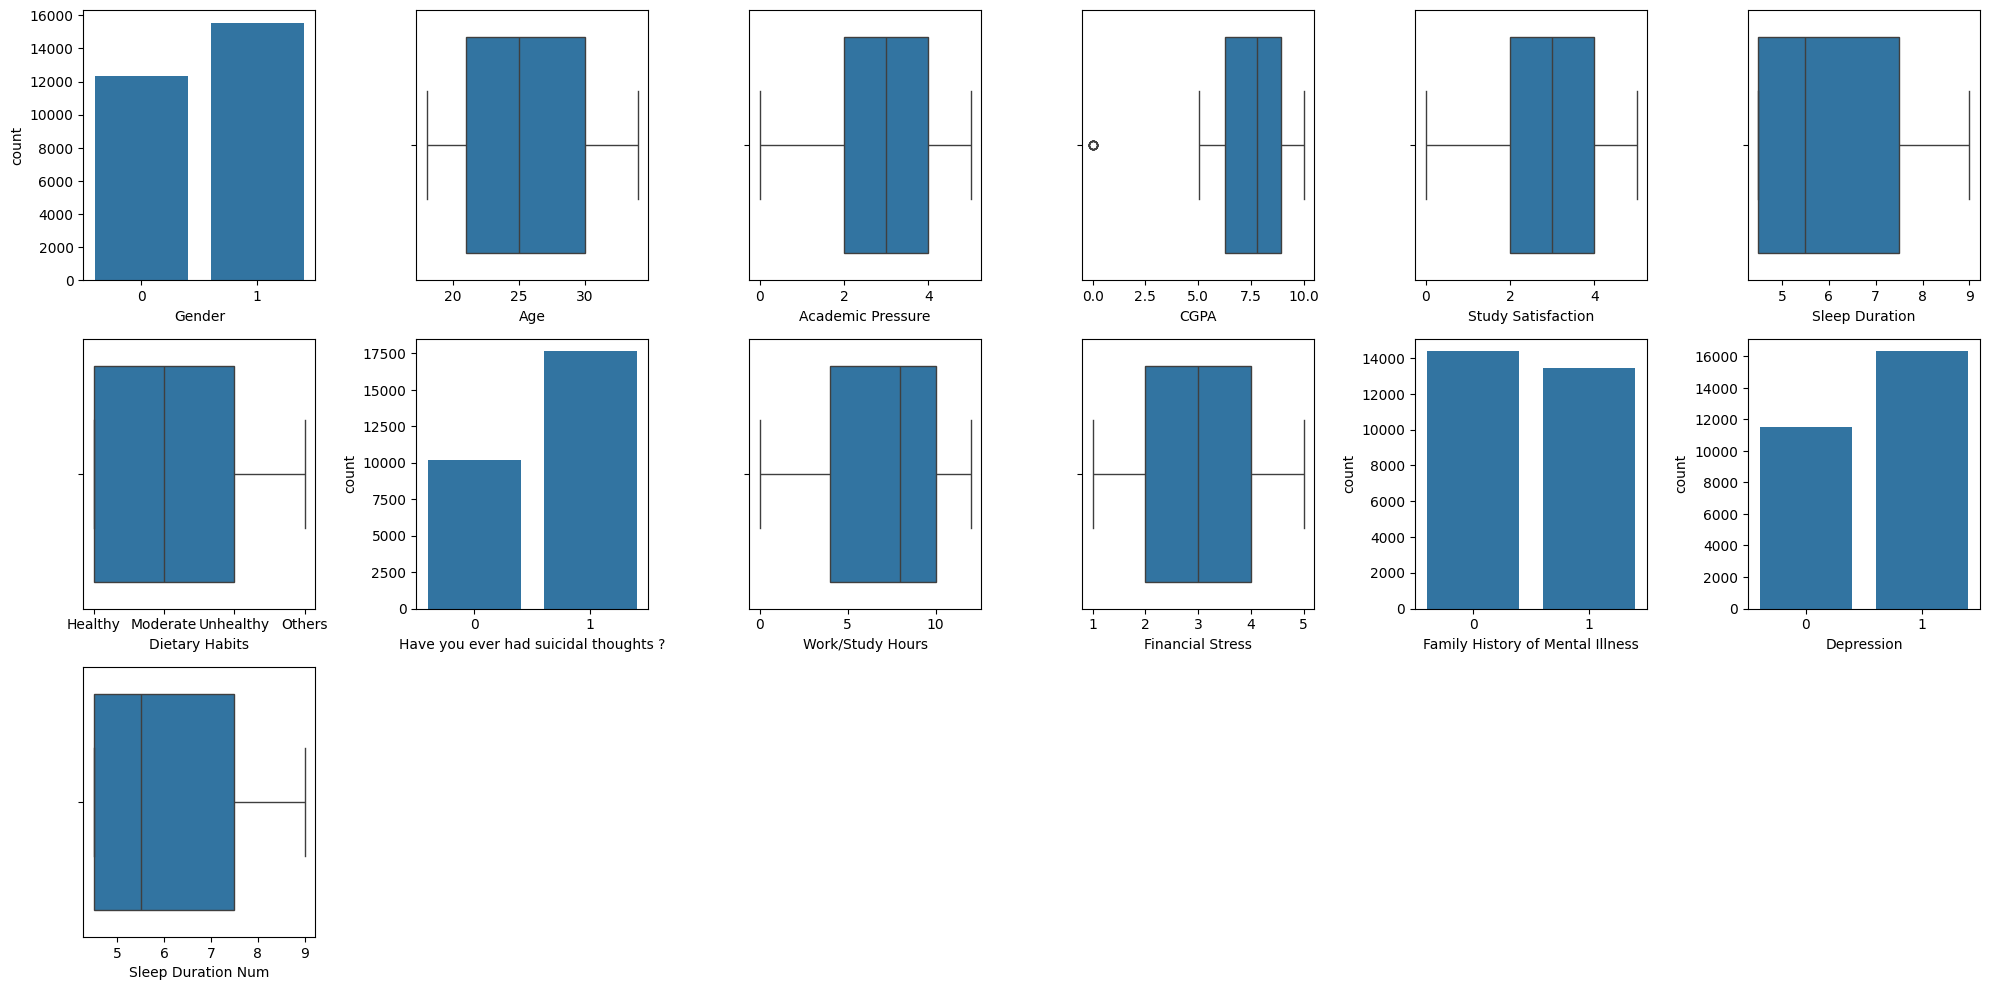

In [59]:

plt.figure(figsize=(20,10)) #Crear figura de 20 x 10
for col in data.columns: #Iterar
    plt.subplot(3 , 6, data.columns.get_loc(col) +1 ) 
    if col == "Gender": #si la columna es la clase
        sns.countplot(data, x = "Gender")
    elif col == "City":
        sns.countplot(data, x = "City")
    elif col == "Have you ever had suicidal thoughts ?": #si la columna es la clase
        sns.countplot(data, x = "Have you ever had suicidal thoughts ?")
    elif col == "Family History of Mental Illness": #si la columna es la clase
        sns.countplot(data, x = "Family History of Mental Illness")
    elif col == "Depression": #si la columna es la clase
        sns.countplot(data, x = "Depression")
    else:
        sns.boxplot(data, x = col) #Mostrar un boxplot
    plt.tight_layout() #Ordenar visualmente
    plt.show

Analisis de los datos

In [55]:
X = data.drop(columns =["Depression"])
y = data["Depression"]

In [56]:
#Matriz de correlación
correlation_matrix = X.corr()
sns.heatmap(X.corr(), annot = True)

ValueError: could not convert string to float: '5-6 hours'